### Rossmann Store Sales Competition
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We are provided with historical sales data for 1,115 Rossman stores. The task is to forevast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#### Required Libraries

In [1]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [2]:
od.download("https://www.kaggle.com/competitions/rossmann-store-sales")

Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [3]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

Loading the dataset into pandas dataframe

In [4]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory = False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [5]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [7]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Let's merge the store_df into train_df and test_df

In [9]:
merged_df = ross_df.merge(store_df, how = "left", on = "Store")
merged_test_df = test_df.merge(store_df, how = "left", on = "Store")

In [10]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Exploratory Data Analysis

#### Statistics of Dataset

In [11]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


Let's see the number of types of stores

In [12]:
merged_df.StoreType.value_counts()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

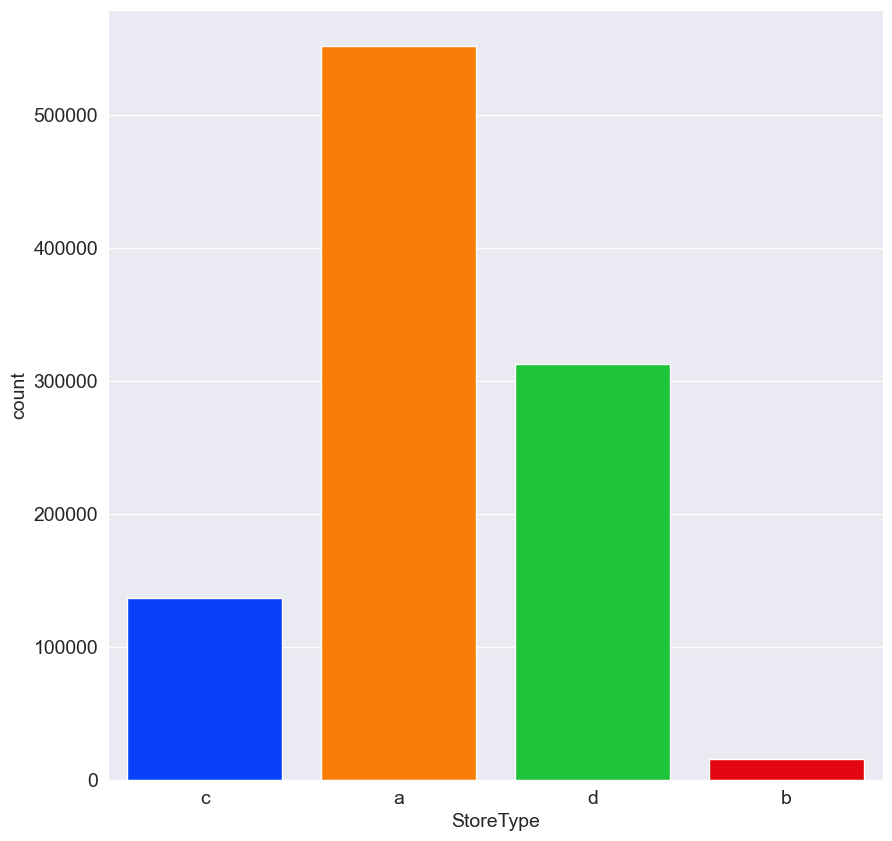

In [15]:
# Countplot for StoreType
sns.countplot(data = merged_df, x = merged_df['StoreType'], palette = 'bright', saturation = 0.95)
plt.show()

#### Insight

* Store a is the highest number of StoreType while b is the lowest.
* Store a might be a dominating factor in sales while store type b might be influential in bringing the sales numbers down.

Let's check out the relationship between StoreTypes and Sales

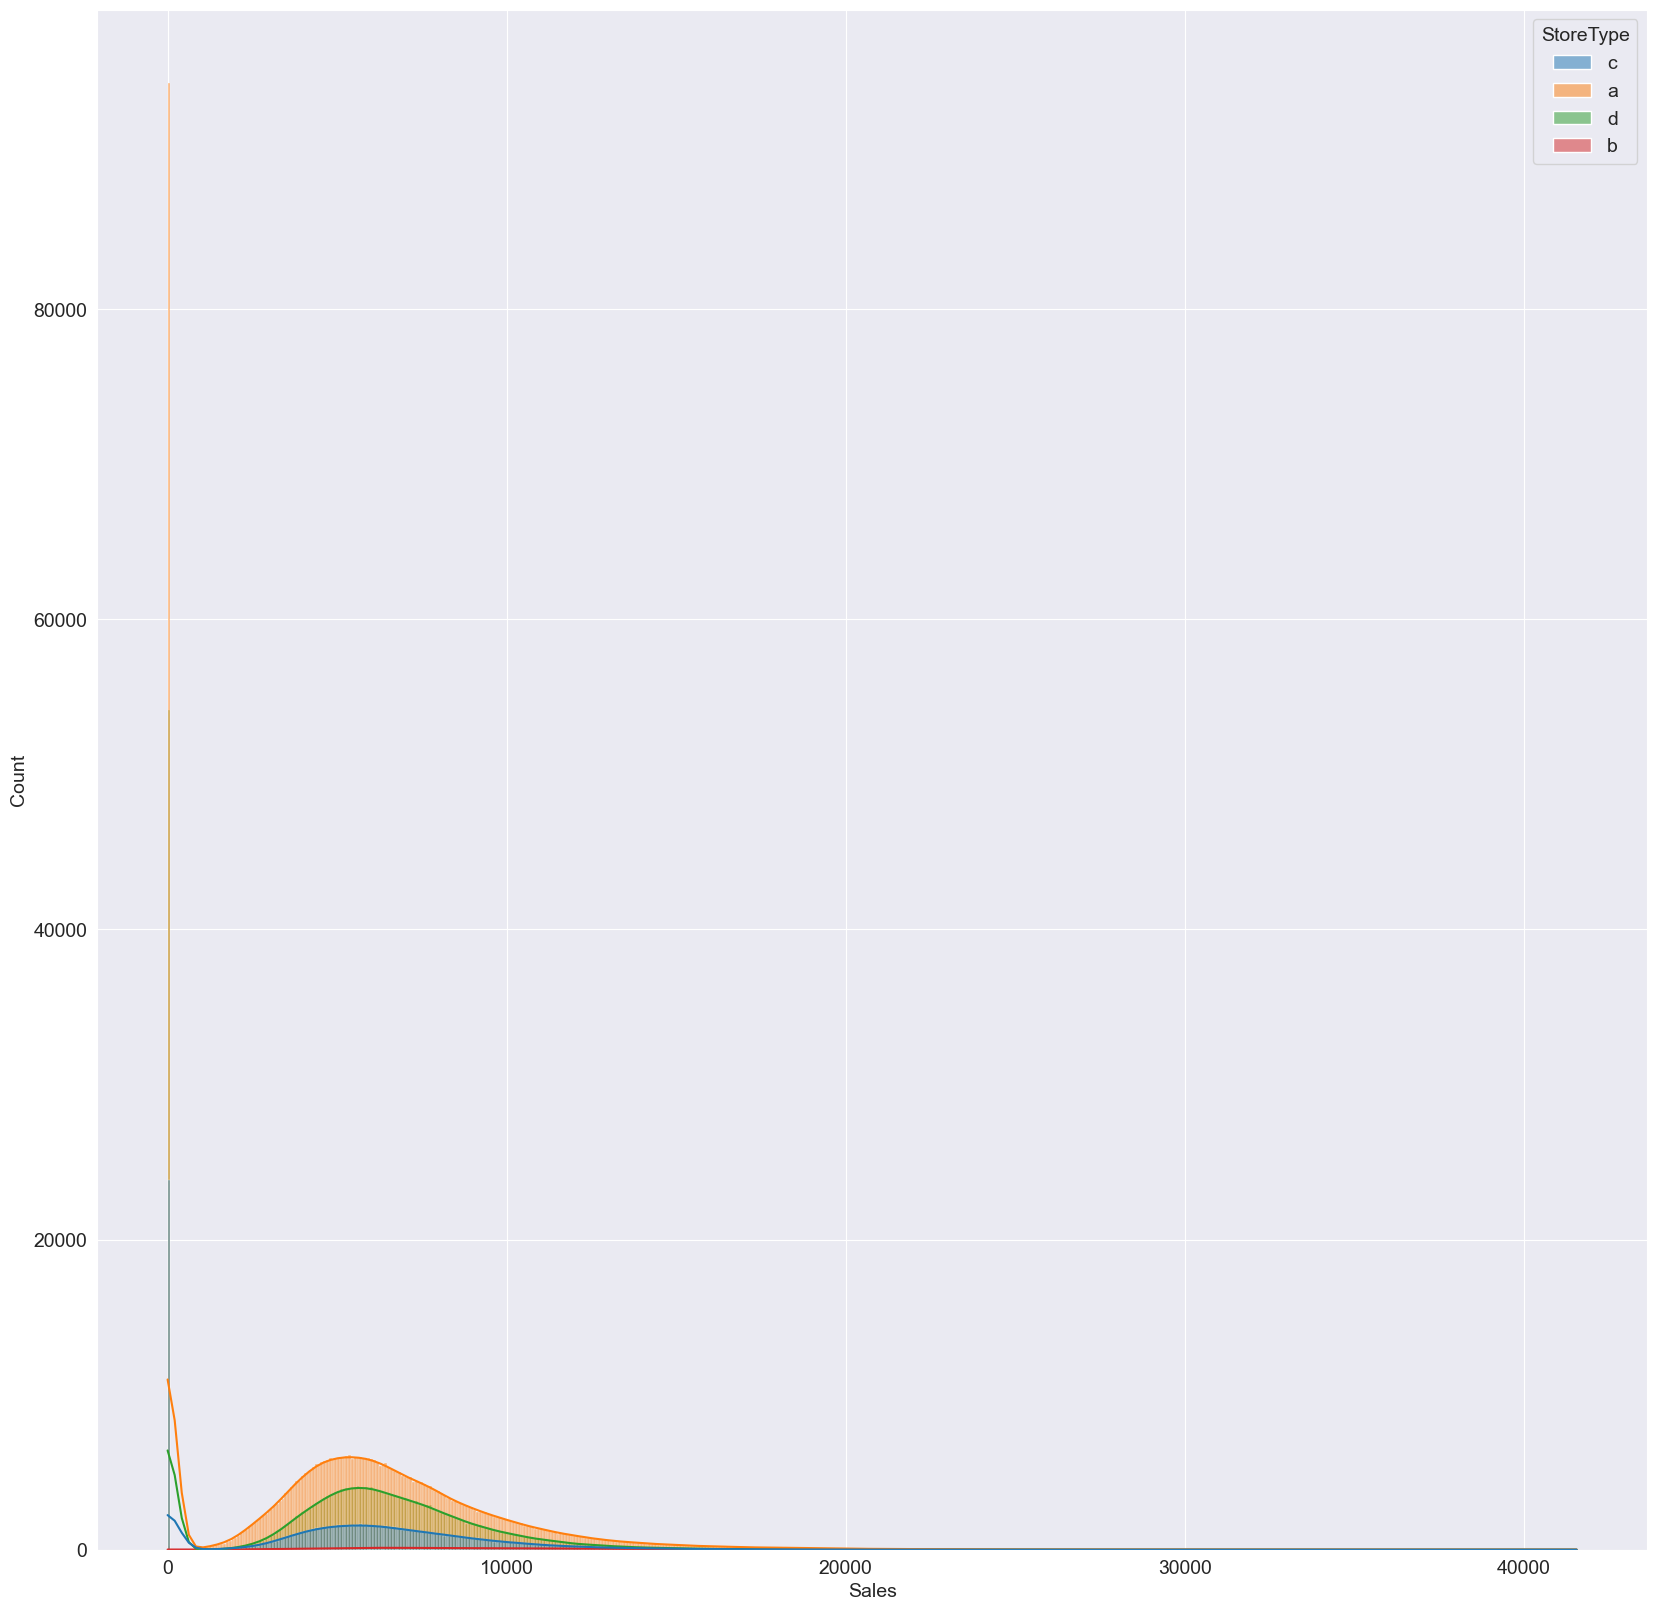

In [16]:
plt.figure(figsize = (20, 20))
sns.histplot(data = merged_df, x = 'Sales', kde = True, hue = 'StoreType')
plt.show()

In [17]:
merged_df.corr(numeric_only = True)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


<Axes: >

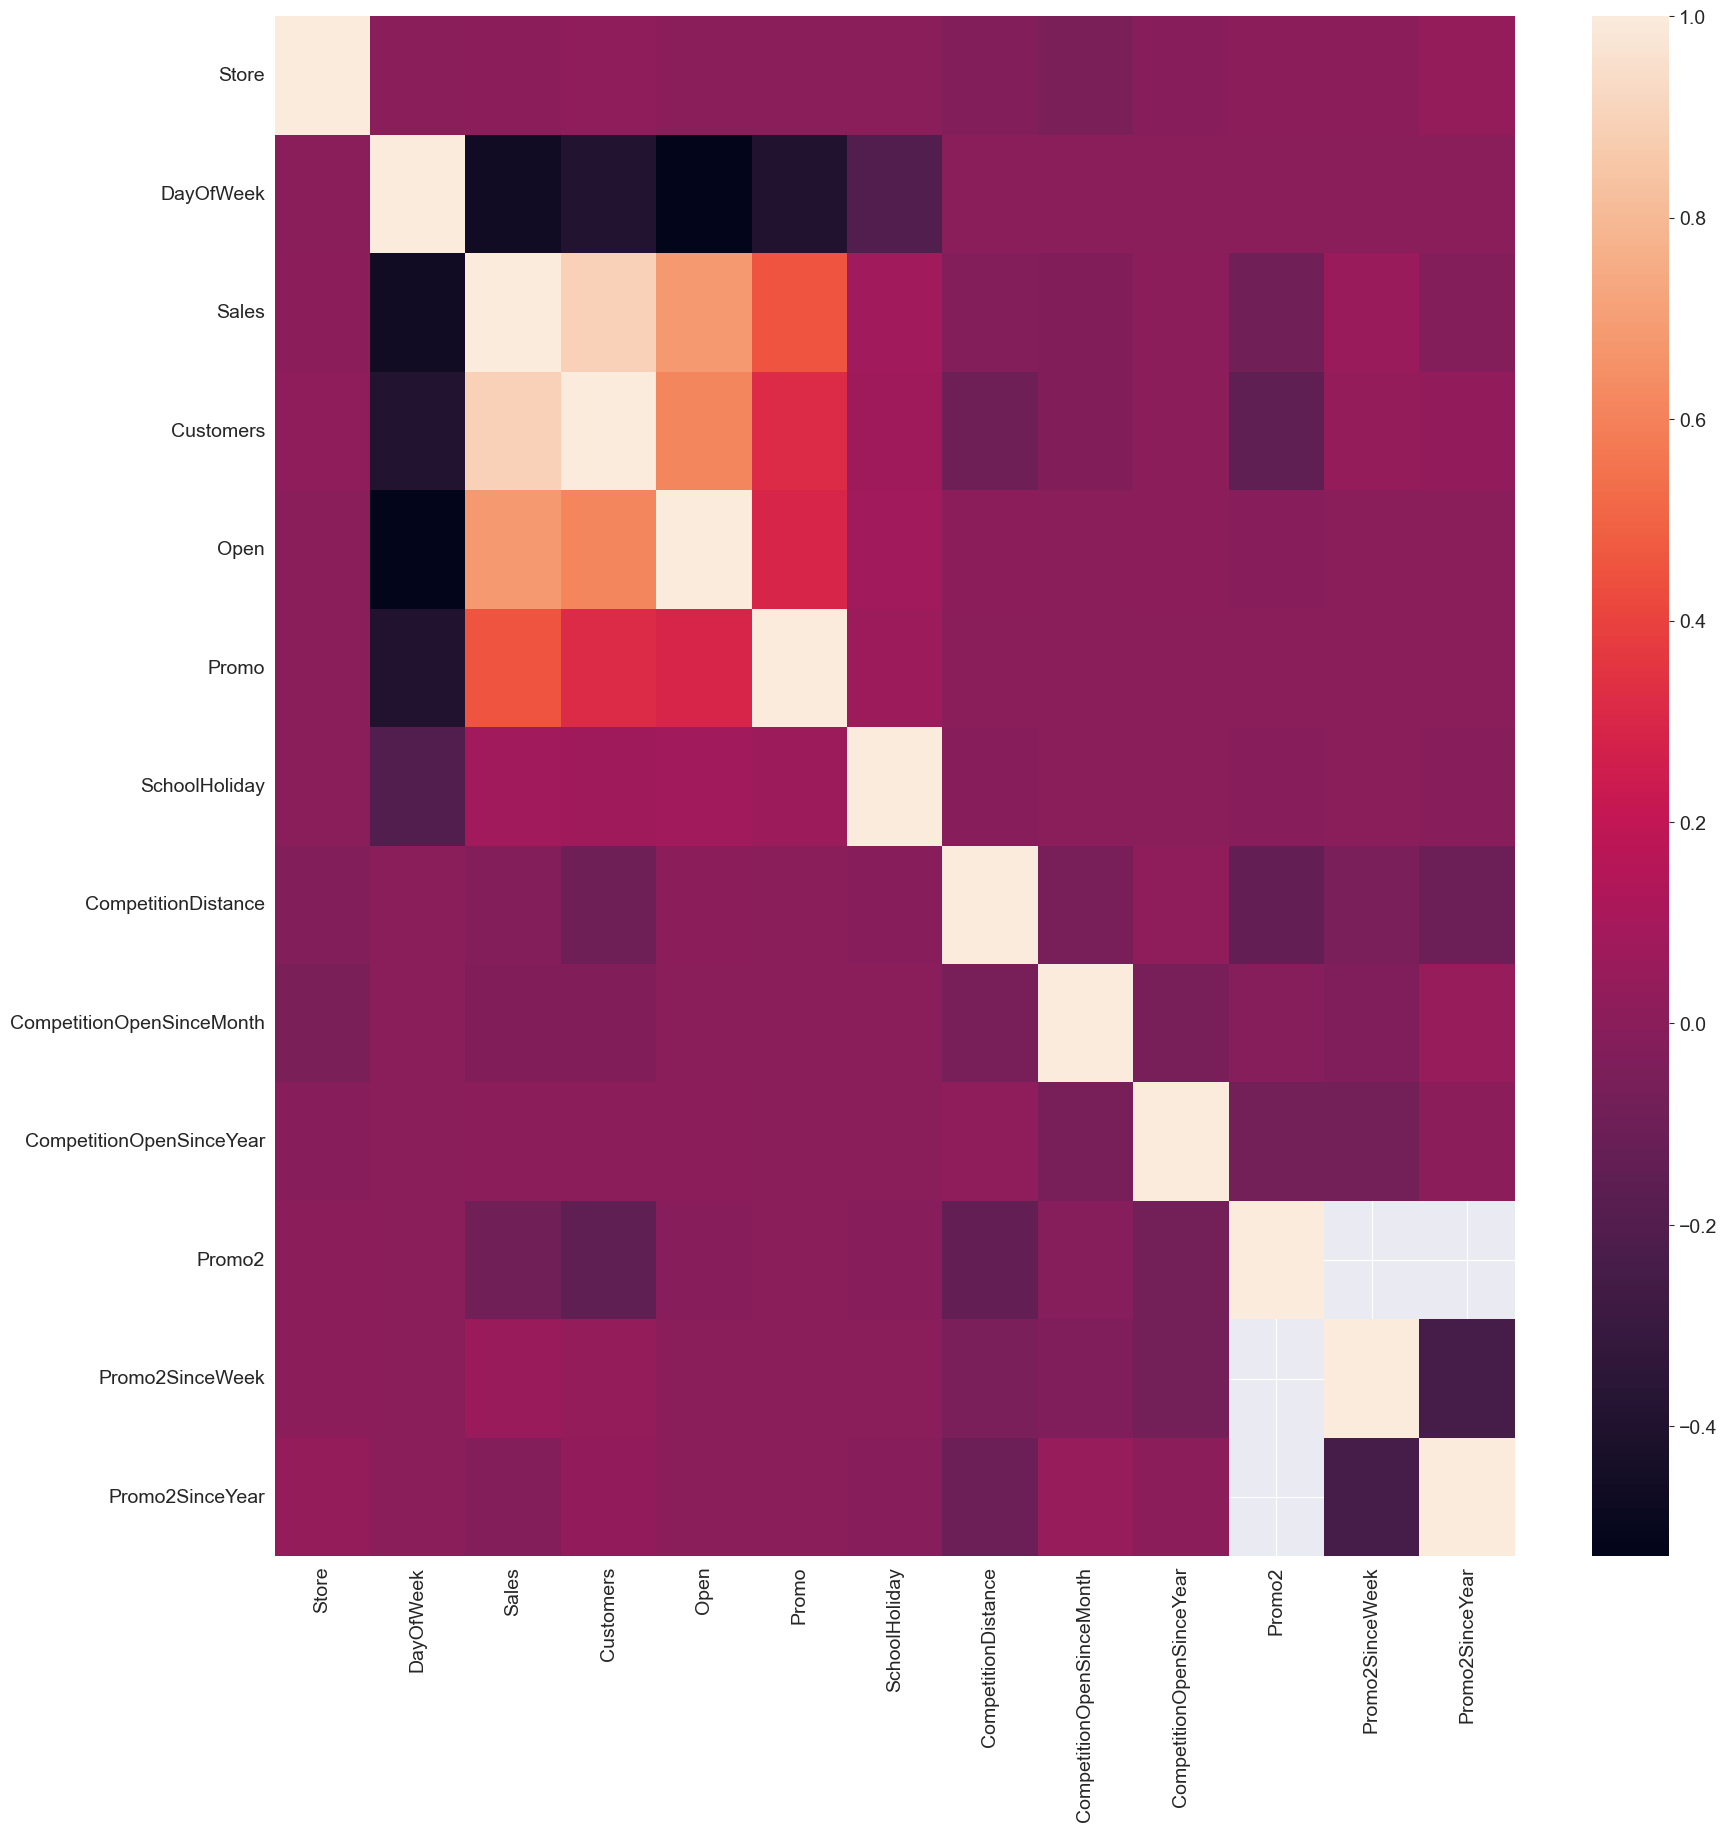

In [18]:
# Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(merged_df.corr(numeric_only = True))

In [19]:
merged_df.Customers.corr(merged_df.Sales)

0.8947107733017018

In [20]:
merged_df.DayOfWeek.corr(merged_df.Sales)

-0.4621250232272873

#### Insights
* Number of customers and sales are almost directly correlated as expected
* DayOfWeek and Sales are highly negatively correlated. People are likely to go shopping on weekends as expected.


### Preprocessing and Feature Engineering

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Insights
* Date Column might not be useful as the training set's all data belongs to the past and dates in the testing set contains dates for the future. 
* Can be useful to generate day of the month to get the sales cycle. Eg. First week of the year can have a lot of sales in contrast to middle year weeks.

#### Date
Let's convert Date to datecolumn and extract different parts of the date.

In [22]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [23]:
split_date(merged_df)
split_date(merged_test_df)

In [24]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


#### Store Open/Closed
When the stores are closed, it's highly unlikely they will have any sales. Let's verify.

In [25]:
merged_df[merged_df.Open == 0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

#### Insights
* 172817 days where the stores are called and sales are 0. It would be much easier to just hard-code the model to predict that the sales will be 0 when the stores are closed.
* Also, we can remove all the rows that have Stores Open == 0 from the training set.



In [26]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [27]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


#### Competition
We can use CompetitionOpenSince[Month/Year] to generate the number of months for which a competitor has been open near the store.

In [28]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [29]:
comp_months(merged_df)
comp_months(merged_test_df)

In [30]:
merged_df[['Date', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']]

,Date,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
0,2015-07-31,2008.0,9.0,82.0
1,2015-07-31,2007.0,11.0,92.0
2,2015-07-31,2006.0,12.0,103.0
3,2015-07-31,2009.0,9.0,70.0
4,2015-07-31,2015.0,4.0,3.0
...,...,...,...,...
1016776,2013-01-01,2006.0,9.0,76.0
1016827,2013-01-01,1999.0,10.0,159.0
1016863,2013-01-01,NaN,NaN,0.0
1017042,2013-01-01,NaN,NaN,0.0


#### Additional Promotion
We can now add some additional columns to indicate how long a store has been running Promo2 and whether a new round of Promo2 starts in the current month. 

In [31]:
def check_promo_month(row):
    # To check the promo month, we have to change all the numerical months to strings
    month2str = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July',
                 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(",")
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0


In [32]:
def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) * 7/30.5
    df['Promo2Open'] = df['Promo2Open'].astype(float)
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

    # Check if the promo is currently running
    df['IsPromo2Month'] = df.apply(check_promo_month, axis = 1) * df['Promo2']

In [33]:
promo_cols(merged_df)
promo_cols(merged_test_df)

Let's view the reuslts

In [34]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']]

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
0,2015-07-31,0,NaN,NaN,NaN,0.000000,0
1,2015-07-31,1,2010.0,13.0,"Jan,Apr,Jul,Oct",64.131148,0
2,2015-07-31,1,2011.0,14.0,"Jan,Apr,Jul,Oct",51.901639,0
3,2015-07-31,0,NaN,NaN,NaN,0.000000,0
4,2015-07-31,0,NaN,NaN,NaN,0.000000,0
...,...,...,...,...,...,...,...
1016776,2013-01-01,0,NaN,NaN,NaN,0.000000,0
1016827,2013-01-01,0,NaN,NaN,NaN,0.000000,0
1016863,2013-01-01,1,2012.0,48.0,"Jan,Apr,Jul,Oct",1.213115,1
1017042,2013-01-01,0,NaN,NaN,NaN,0.000000,0


#### Input and Target Column
Let's select the columns that we'll use for the training.

In [35]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [36]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2', 'Promo2Open', 'IsPromo2Month']
target_col = ['Sales']

In [37]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [38]:
test_inputs = merged_test_df[input_cols].copy()

Let's now identify numerical and categorical columns. We can treat binary columns as numeric.

In [39]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


In [40]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day', 'Month', 'Year', 'WeekOfYear']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

#### Impute Missing Numerical Data

In [41]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [42]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

Competition Distance is the only column with the missing values. If we put values as 0, this will mean that the stores are very close to each other. We want the distance to be put far away from the current store so that it seems the competition store does not really change the sales of the current store.

In [43]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [44]:
inputs['CompetitionDistance'].fillna(max_distance * 2, inplace = True)
test_inputs['CompetitionDistance'].fillna(max_distance * 2, inplace = True)

#### Scale Numeric Values

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [47]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encoding Categorical Values

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [50]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Extraction of all numeric data for training.

In [51]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Skipping creation of Validation Set to use K-fold cross validation.

### Gradient Boosting
1. Average value of the target column and uses as an initial prediction every input.
2. Residuals of predictions with the targets are computed.
3. Decision tree of limited depth is trained to predict just the residuals.
4. Predictions from decision tree are scaled using a parameter called learning rate (to prevent overfitting).
5. Scaled predictions from the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

In [52]:
from xgboost import XGBRegressor

In [53]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 20, max_depth = 4)

In [54]:
# Training the model
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [55]:
preds = model.predict(X)

In [56]:
preds

array([ 8323.876 ,  7716.3643,  8634.874 , ...,  6486.2563,  9425.463 ,
       10267.539 ], dtype=float32)

#### Evaluation
Using RMSE Error.

In [57]:
from sklearn.metrics import mean_squared_error
def rmse(a, b):
    return mean_squared_error(a, b, squared = False)

In [58]:
rmse(preds, targets)

2379.43030430541

In [59]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

(array([6.720e+02, 4.895e+03, 3.114e+03, 9.270e+02, 2.380e+02, 1.040e+02,
        3.900e+01, 9.000e+00, 0.000e+00, 2.000e+00]),
 array([    0. ,  3368.4,  6736.8, 10105.2, 13473.6, 16842. , 20210.4,
        23578.8, 26947.2, 30315.6, 33684. ]),
 <BarContainer object of 10 artists>)

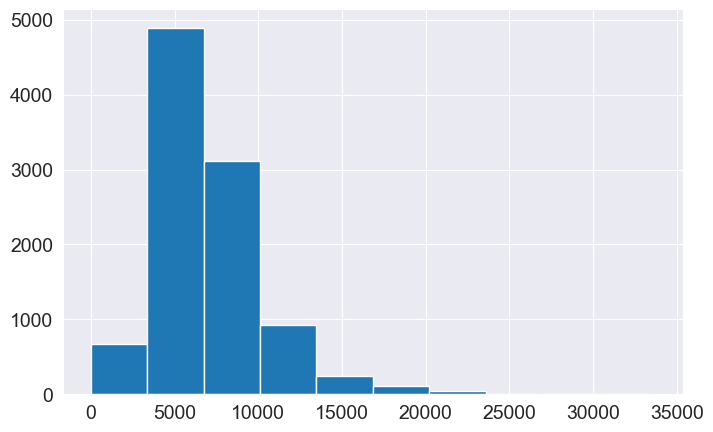

In [60]:
plt.figure(figsize = (8, 5))
plt.hist(merged_df.Sales.sample(10000))

#### Visualization
Using plot_tree

In [63]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 30

<Axes: >

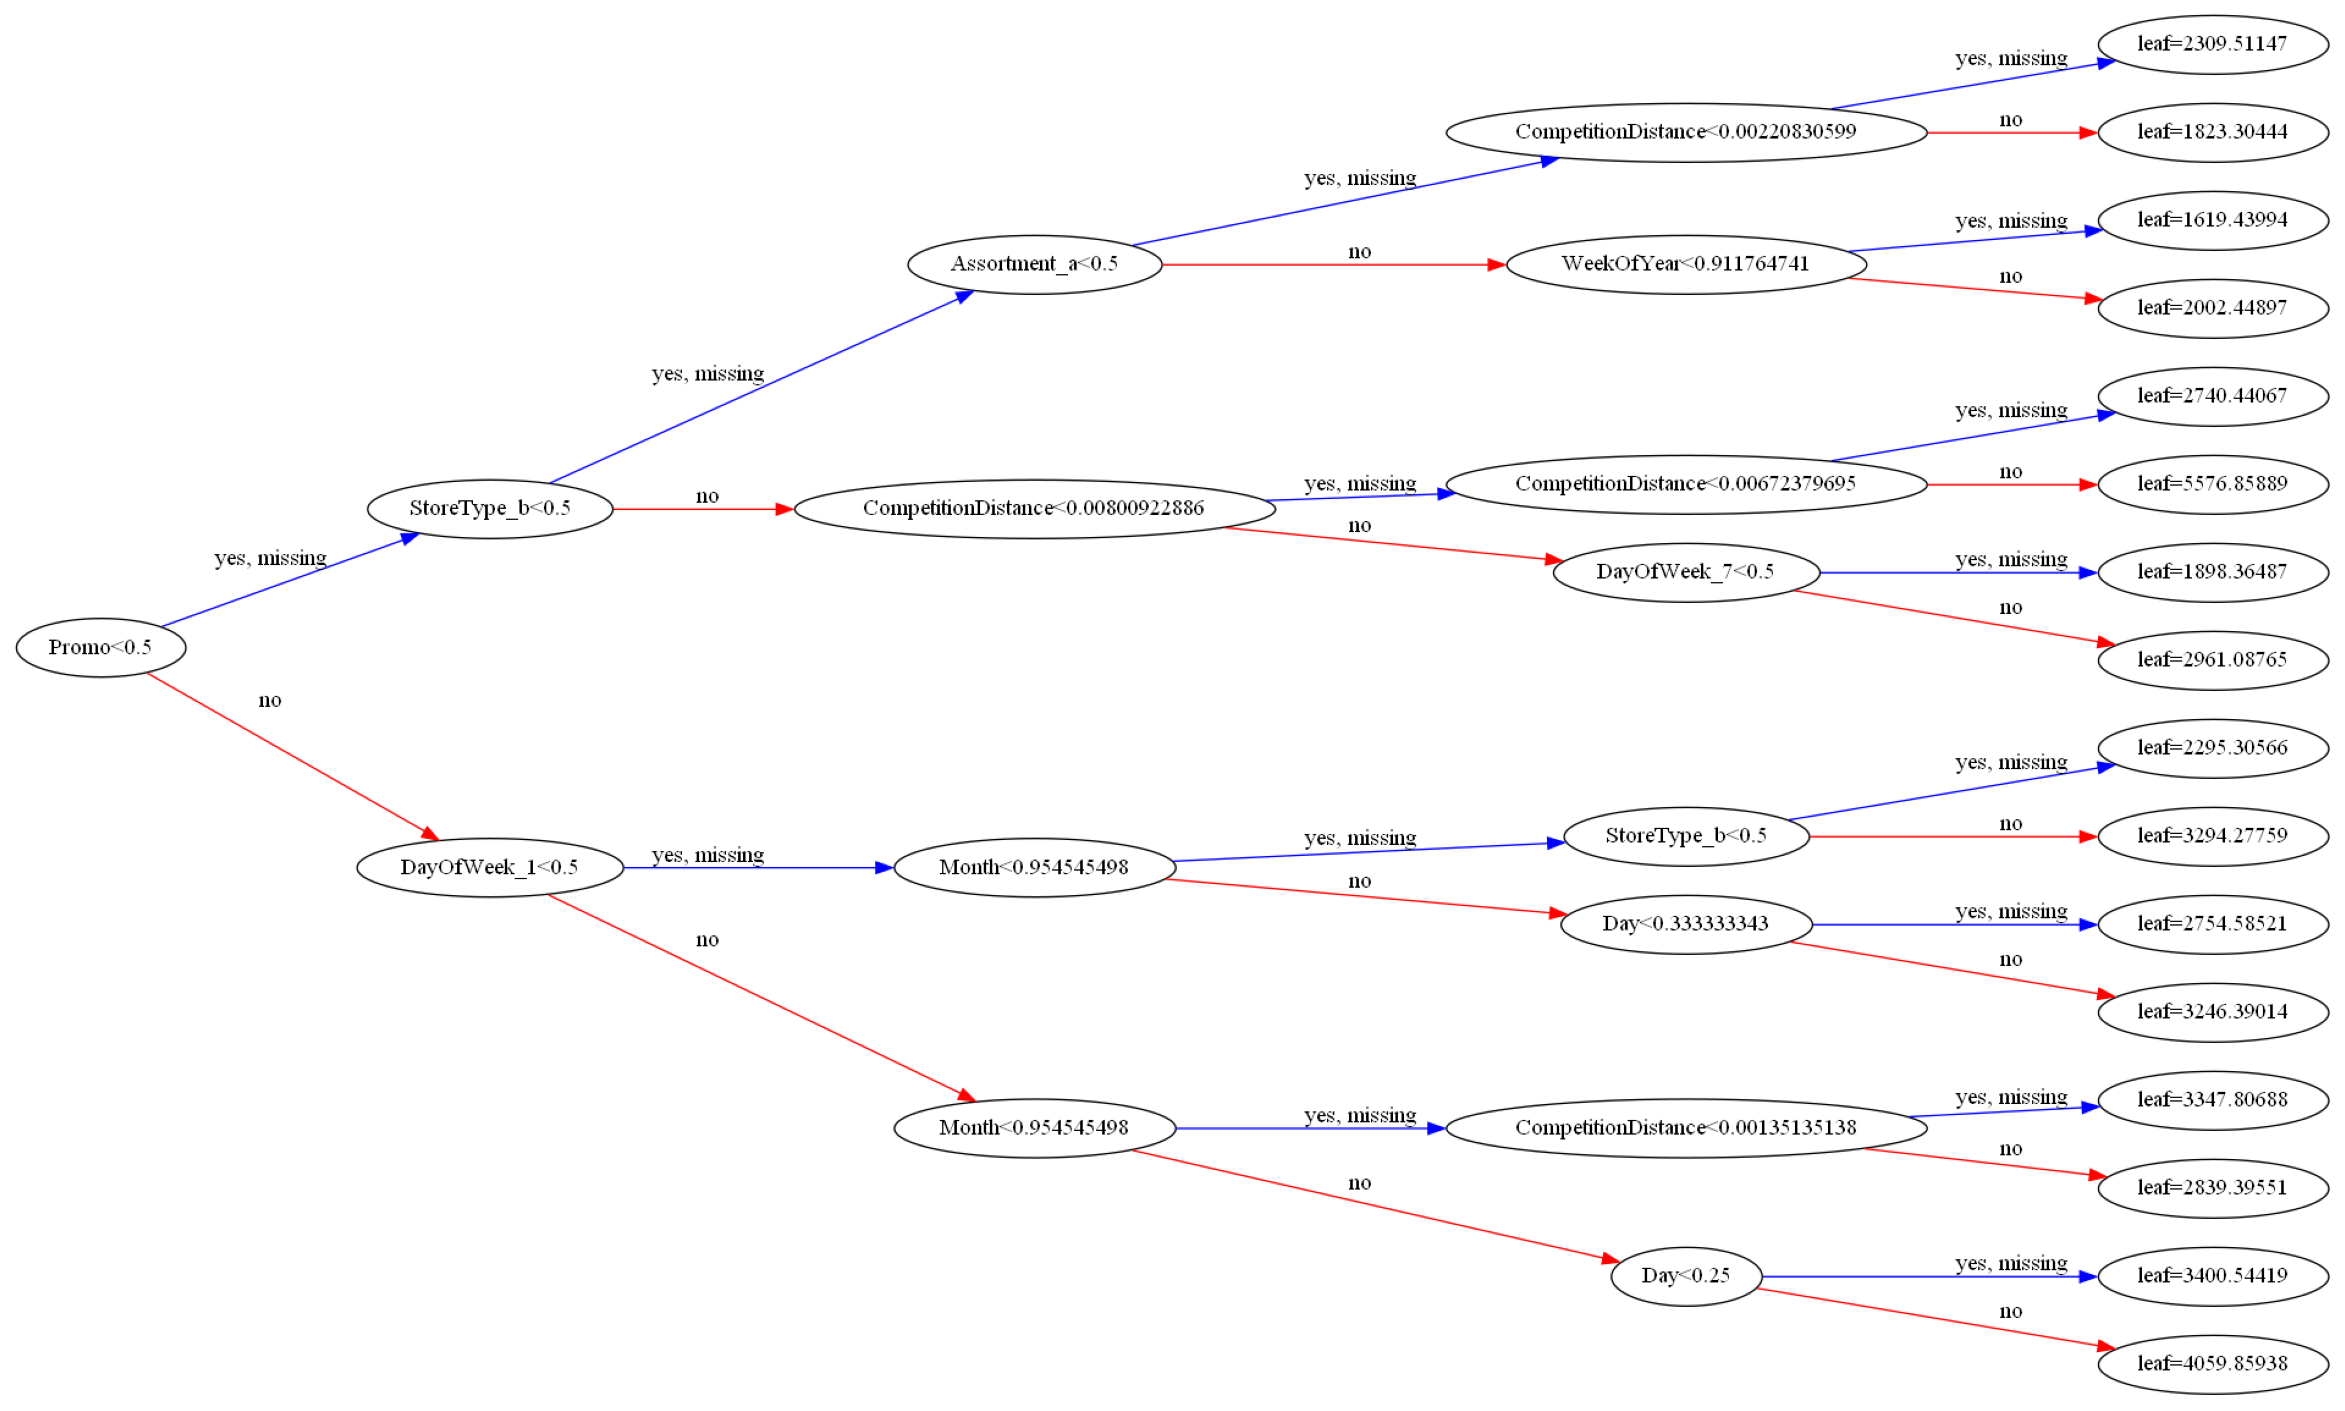

In [64]:
plot_tree(model, rankdir = 'LR', num_trees = 0)

<Axes: >

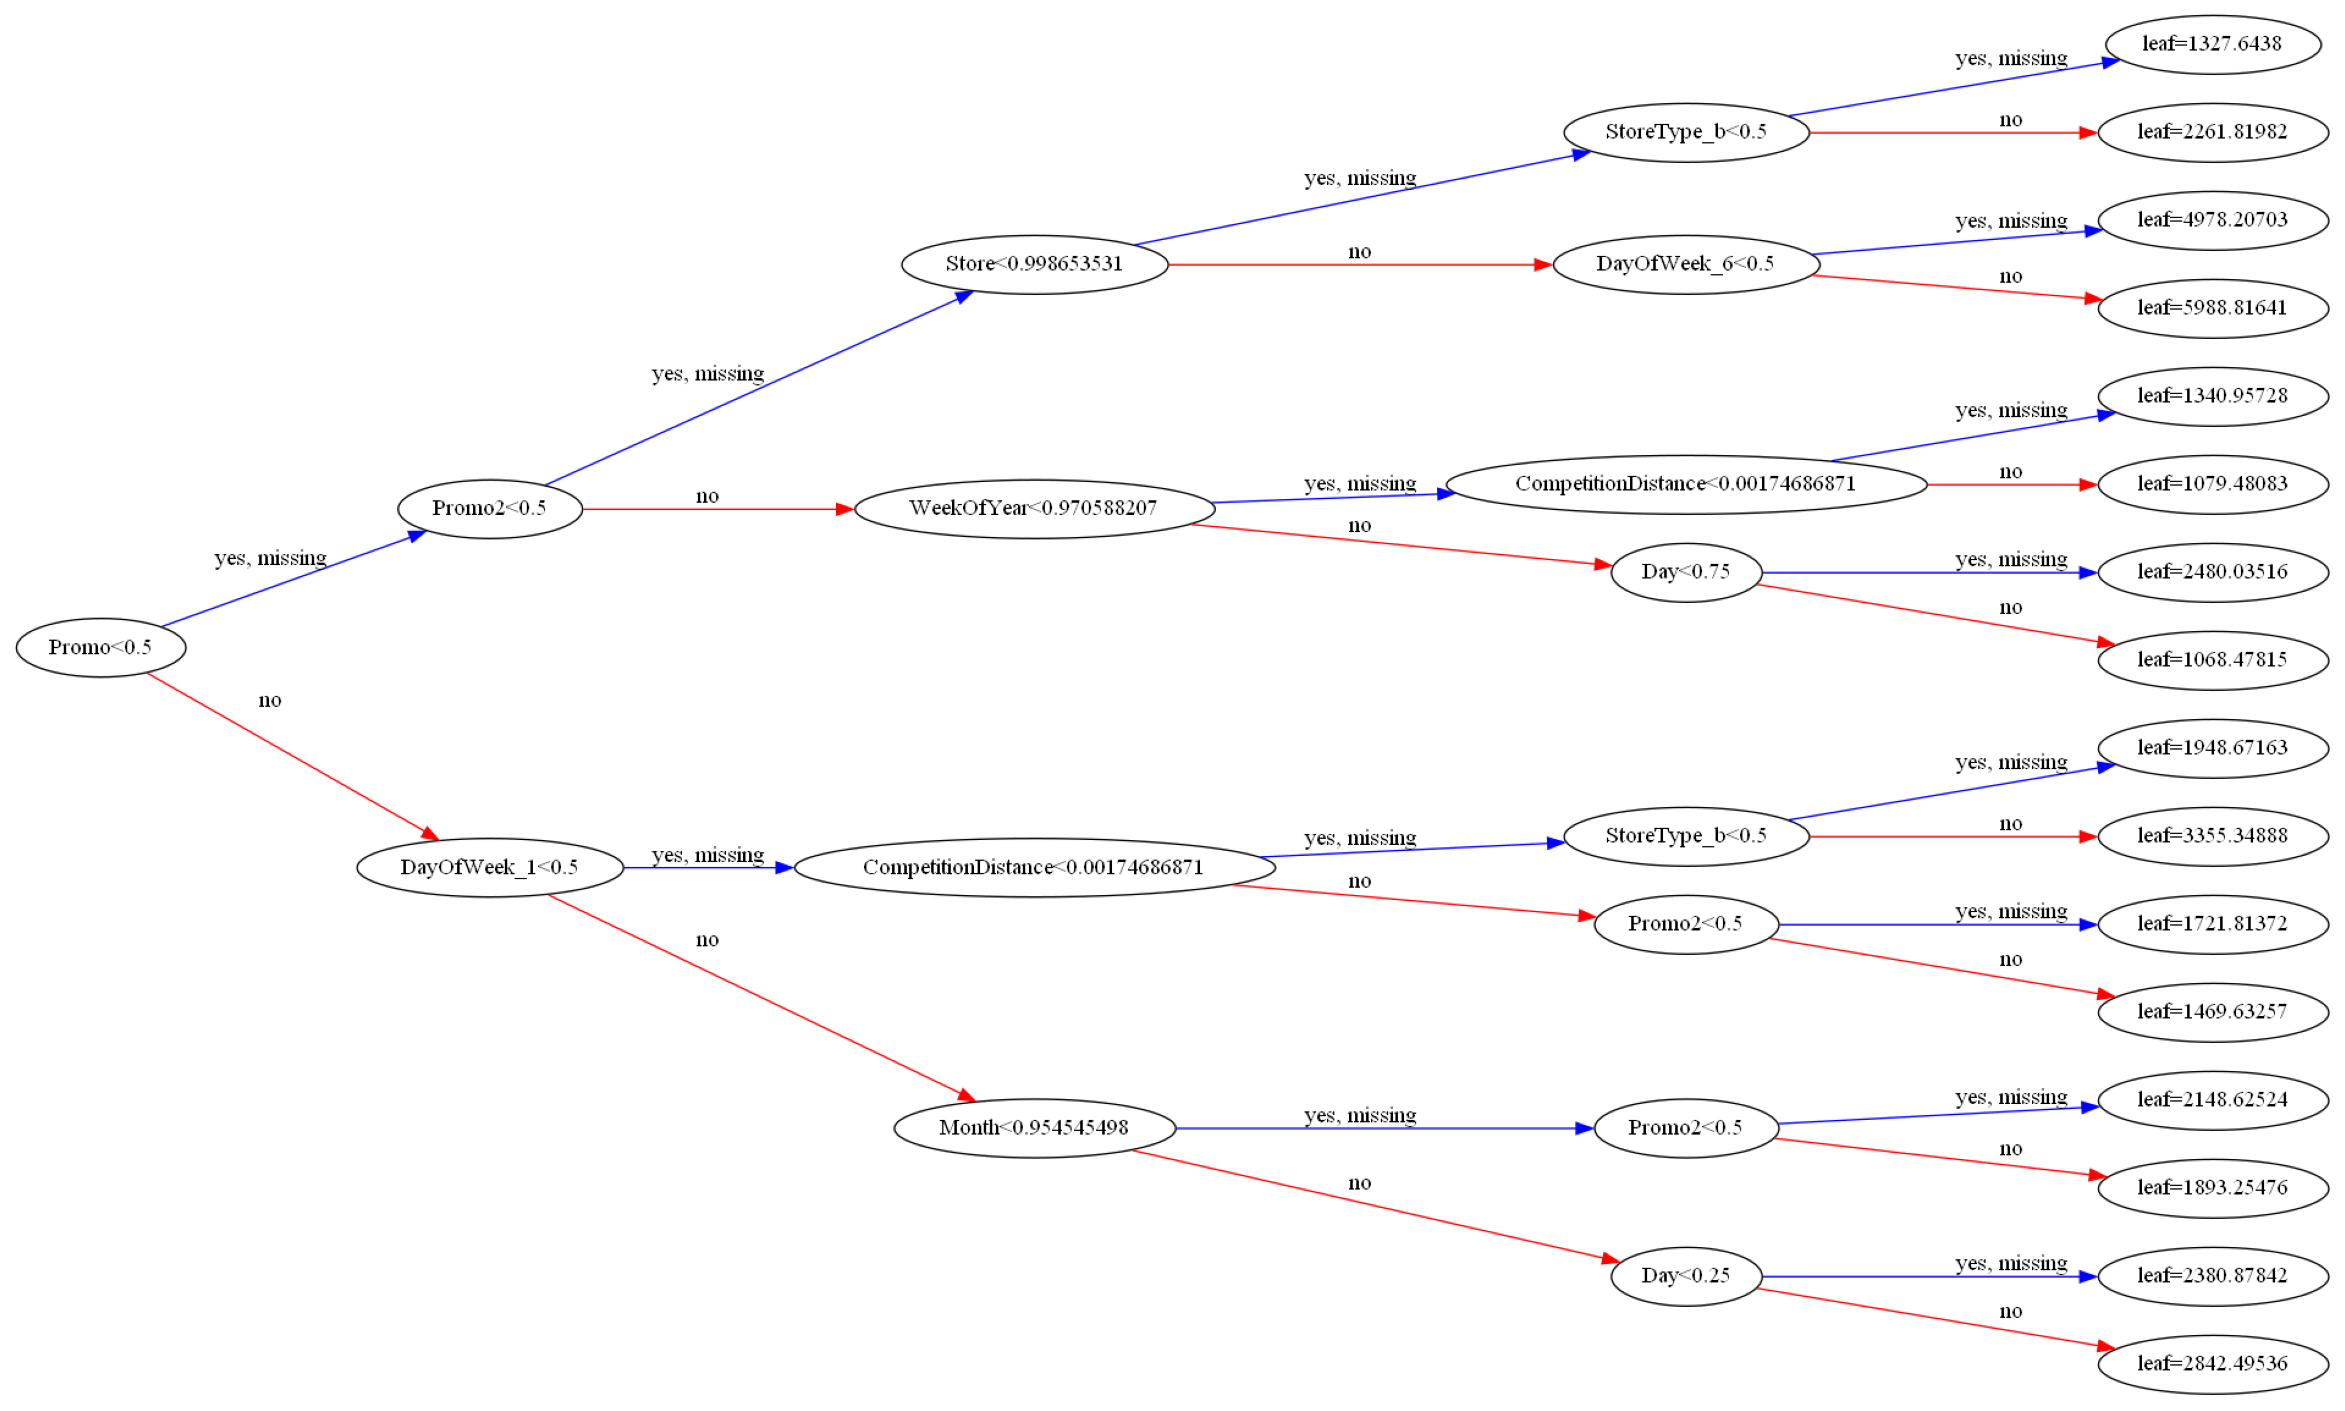

In [65]:
plot_tree(model, rankdir = 'LR', num_trees = 1)

<Axes: >

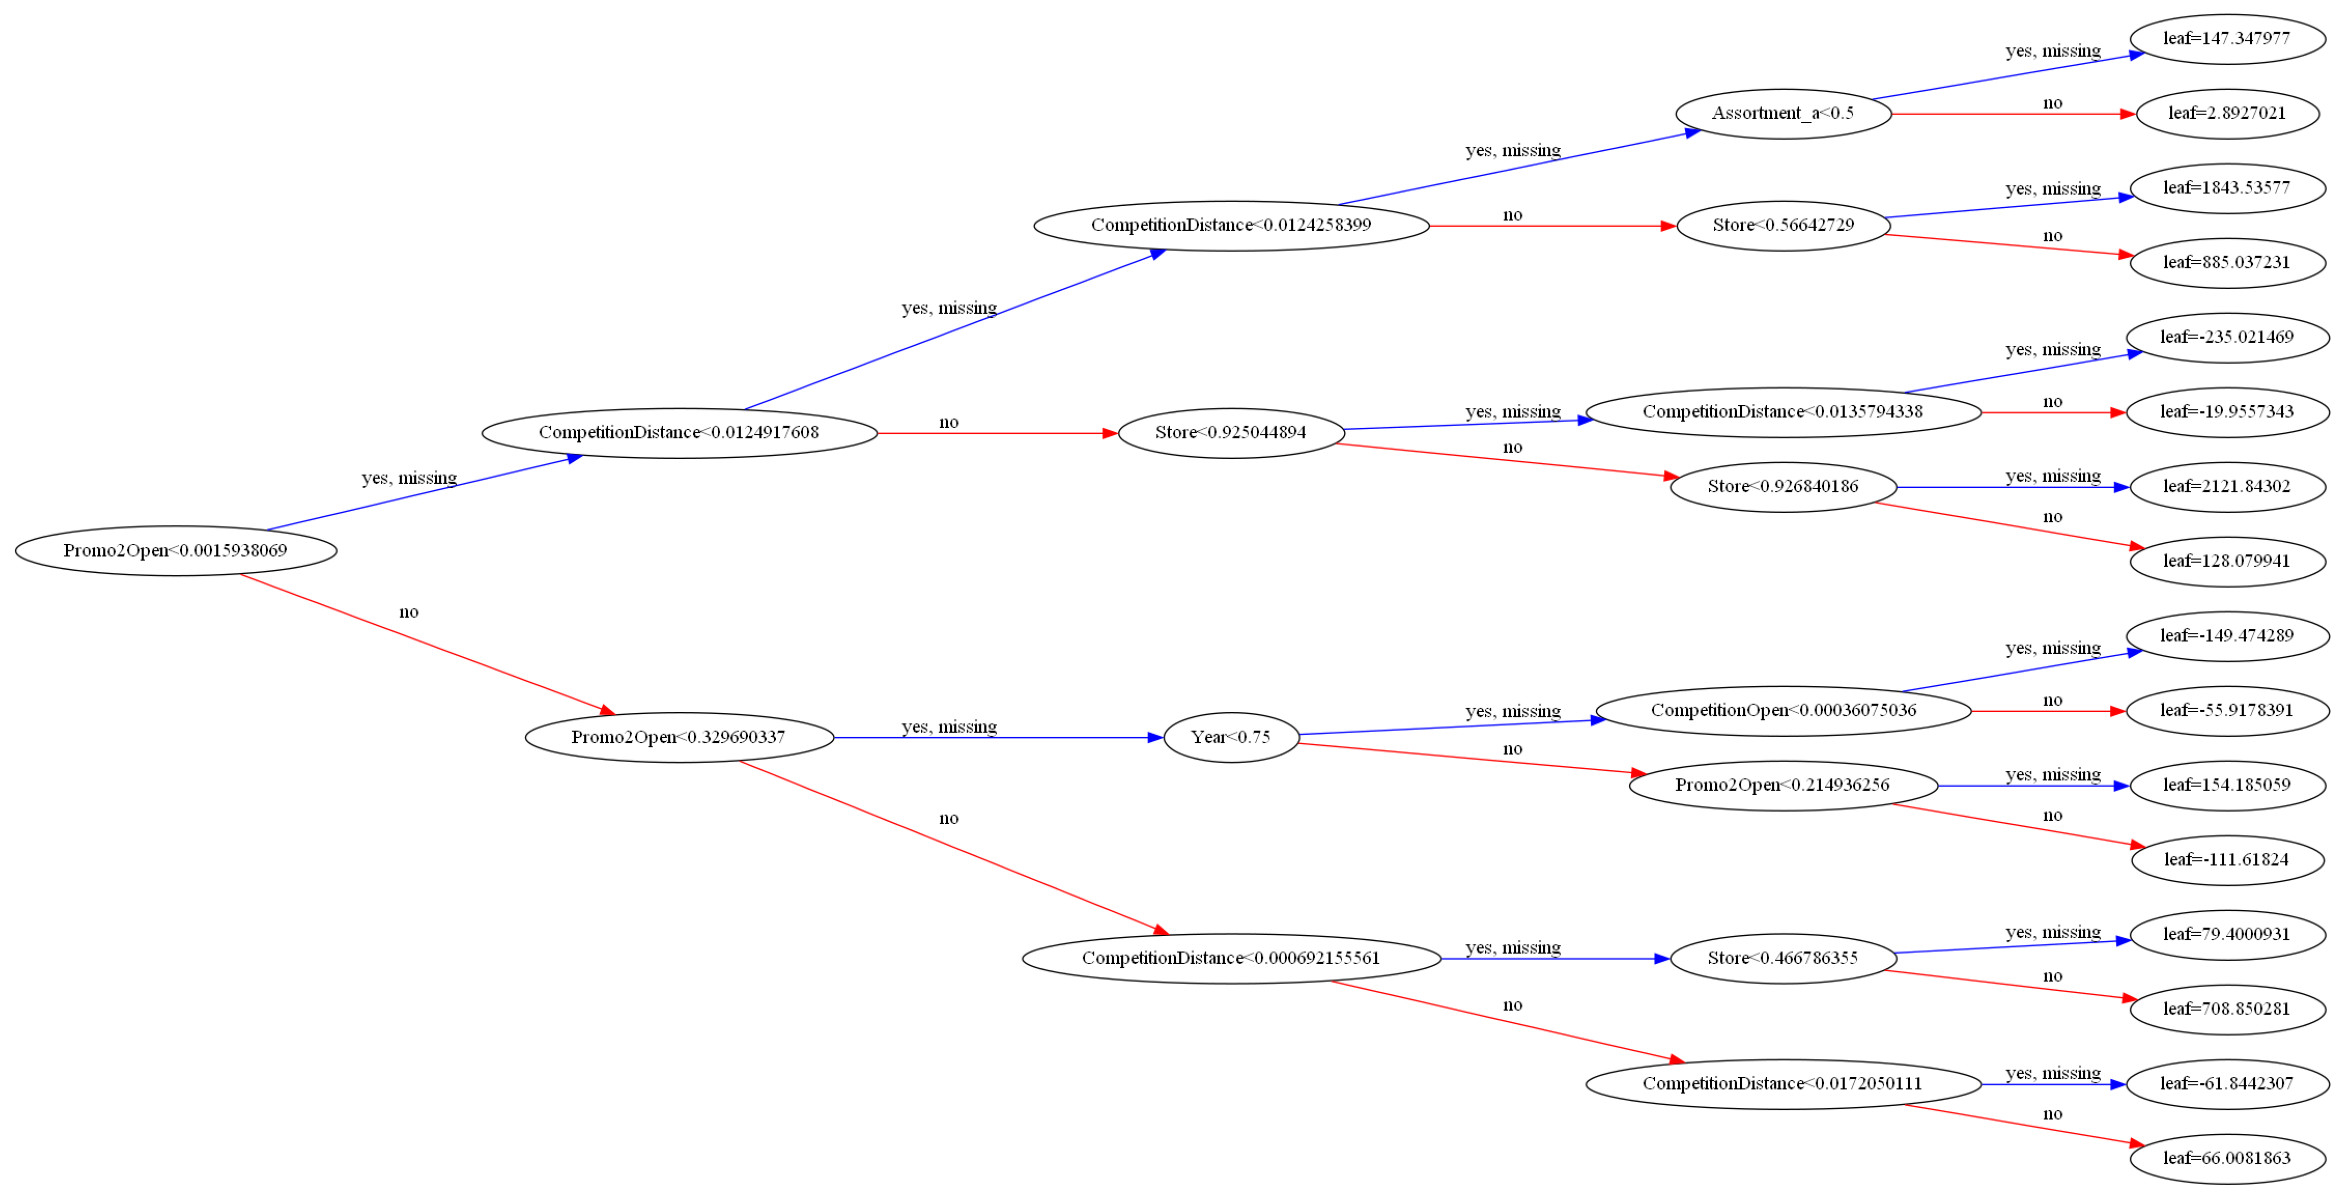

In [66]:
plot_tree(model, rankdir = 'LR', num_trees = 19)

In [67]:
trees = model.get_booster().get_dump()

In [68]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00220830599] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.00800922886] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.00672379695] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.00135135138] yes=27,no=28,missing=27
				27:le

#### Feature Importance

In [69]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [71]:
importance_df.head(10)

,feature,importance
1,Promo,0.333968
24,StoreType_b,0.085717
12,DayOfWeek_1,0.081378
5,Promo2,0.063453
3,CompetitionDistance,0.044638
29,Assortment_c,0.039897
0,Store,0.038769
27,Assortment_a,0.038509
9,Month,0.036780
2,SchoolHoliday,0.035350


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

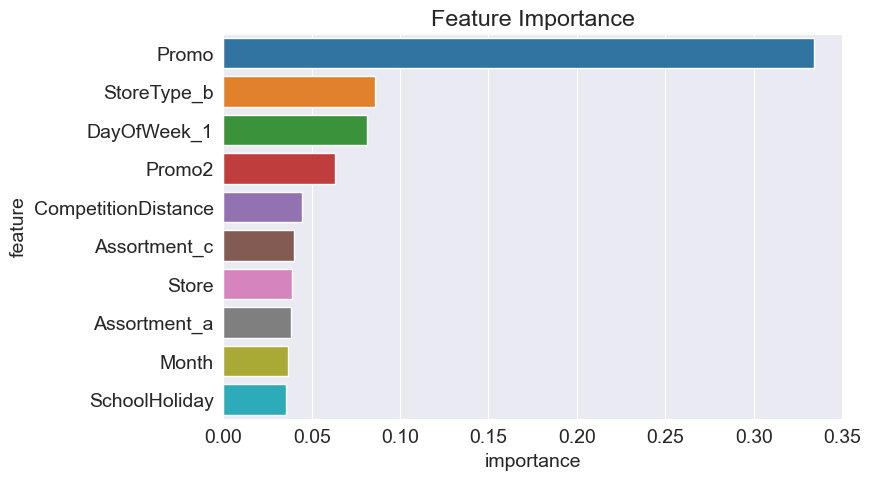

In [74]:
plt.figure(figsize = (8, 5))
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), y = 'feature', x = 'importance')

#### K-Fold Cross Validation
Resource used: https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

In [75]:
from sklearn.model_selection import KFold

In [76]:
# Helper function instead of directly training the model.
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state = 42, n_jobs = -1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [83]:
kfold = KFold(n_splits = 5, shuffle = True)

In [84]:
models = []

for train_idxs , val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train,
                                                     train_targets,
                                                     X_val,
                                                     val_targets,
                                                     max_depth = 4,
                                                     n_estimators = 20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2357.854491278132, Validation RMSE: 2356.869201634462
Train RMSE: 2348.264108327336, Validation RMSE: 2351.499020294087
Train RMSE: 2337.4391107907945, Validation RMSE: 2342.7452152237383
Train RMSE: 2381.829955618347, Validation RMSE: 2371.9895923191984
Train RMSE: 2376.9515047123978, Validation RMSE: 2384.0024188625944


Let's define a function to average predictions from the 5 different models.

In [85]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis = 0)

In [86]:
preds = predict_avg(models, X)

In [87]:
preds

array([ 8121.8936,  7503.0166,  8212.281 , ...,  7811.835 ,  7977.6924,
       10189.588 ], dtype=float32)

#### Hyperparamter Tuning and Regularization

Let's define a helper function to process hyperparamter turning and regularization.\
We will just pick a random sample of 10% for the validation set.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size = 0.1)

In [90]:
def test_params(**params):
    model = XGBRegressor(n_jobs = -1, random_state = 42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print("Train RMSE: {}, Validation RMSE: {}".format(train_rmse, val_rmse))
    return train_rmse, val_rmse

n_estimators\
More the number of trees = greater the capacity of the model

In [94]:
# n_estimators = 10
test_params(n_estimators = 10)

# n_estimators = 30
test_params(n_estimators = 30)

# n_estimators = 100
test_params(n_estimators = 100)

# n_estimators = 250
test_params(n_estimators = 250)

Train RMSE: 2336.771662174894, Validation RMSE: 2353.1385553926557
Train RMSE: 1850.8641630553382, Validation RMSE: 1863.6209067100467
Train RMSE: 1194.8755193682312, Validation RMSE: 1211.0820137758487
Train RMSE: 899.5323074615088, Validation RMSE: 923.0894924017354


In [95]:
n_estimators = [10, 30, 100, 250]
train_rmse = []
val_rmse = []
for n_estimator in n_estimators:
    test_params(n_estimators = n_estimator)
    train_rmse = 